In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
#region region_sample
import warnings
warnings.filterwarnings("ignore")
#endregion
df = pd.read_csv(r"C:\Users\adity\Documents\Final Year Project\filteredData_train.csv")
df


,time,ModuleYear,ModuleMonth,module,Isc,Voc,Ipmax,Vpmax,Pmax,Temp_Mid_avg,Gt,WS,Tamb
0,1/1/2010 8:10,2010,1,S20_REV205,0.500,74.75,0.490,62.35,31.0,6.533,135.4240,0.684,8.26
1,1/1/2010 8:20,2010,1,S20_REV205,0.658,73.22,0.628,62.75,39.0,9.270,174.8295,0.493,8.75
2,1/1/2010 8:30,2010,1,S20_REV205,0.795,72.98,0.751,63.38,48.0,11.480,208.2349,0.694,9.29
3,1/1/2010 8:40,2010,1,S20_REV205,0.926,75.29,0.860,64.14,55.0,13.010,244.6055,0.864,9.76
4,1/1/2010 8:50,2010,1,S20_REV205,1.056,74.98,1.009,63.42,64.0,15.240,275.6980,0.611,10.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18576,12/31/2010 16:00,2010,12,S20_REV205,0.932,73.75,0.832,64.70,54.0,21.060,281.0977,1.958,15.62
18577,12/31/2010 16:10,2010,12,S20_REV205,0.687,71.45,0.621,63.52,39.0,20.560,229.2695,2.020,15.29
18578,12/31/2010 16:20,2010,12,S20_REV205,0.677,71.52,0.623,63.20,39.0,18.300,214.2968,2.555,15.05
18579,12/31/2010 16:30,2010,12,S20_REV205,0.677,73.52,0.617,63.17,39.0,19.550,190.5222,1.437,15.24


In [3]:
x_mod = df[['Gt', 'WS', 'Tamb']]
y_mod = df[['Temp_Mid_avg']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    x_mod, y_mod, test_size=0.2)
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train.values.ravel())

y_pred = regressor.predict(X_test)
daf=pd.DataFrame({'Actual':y_test.values.flatten(), 'Predicted':y_pred,'Error':abs(y_pred-y_test.values.flatten())})
daf

,Actual,Predicted,Error
0,28.92,31.4556,2.5356
1,29.86,29.3511,0.5089
2,47.49,50.7799,3.2899
3,44.22,40.9158,3.3042
4,63.73,61.8039,1.9261
...,...,...,...
3712,45.41,38.4101,6.9999
3713,17.86,20.3713,2.5113
3714,36.66,34.8160,1.8440
3715,43.67,49.0099,5.3399


In [5]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 3.9706237757988774


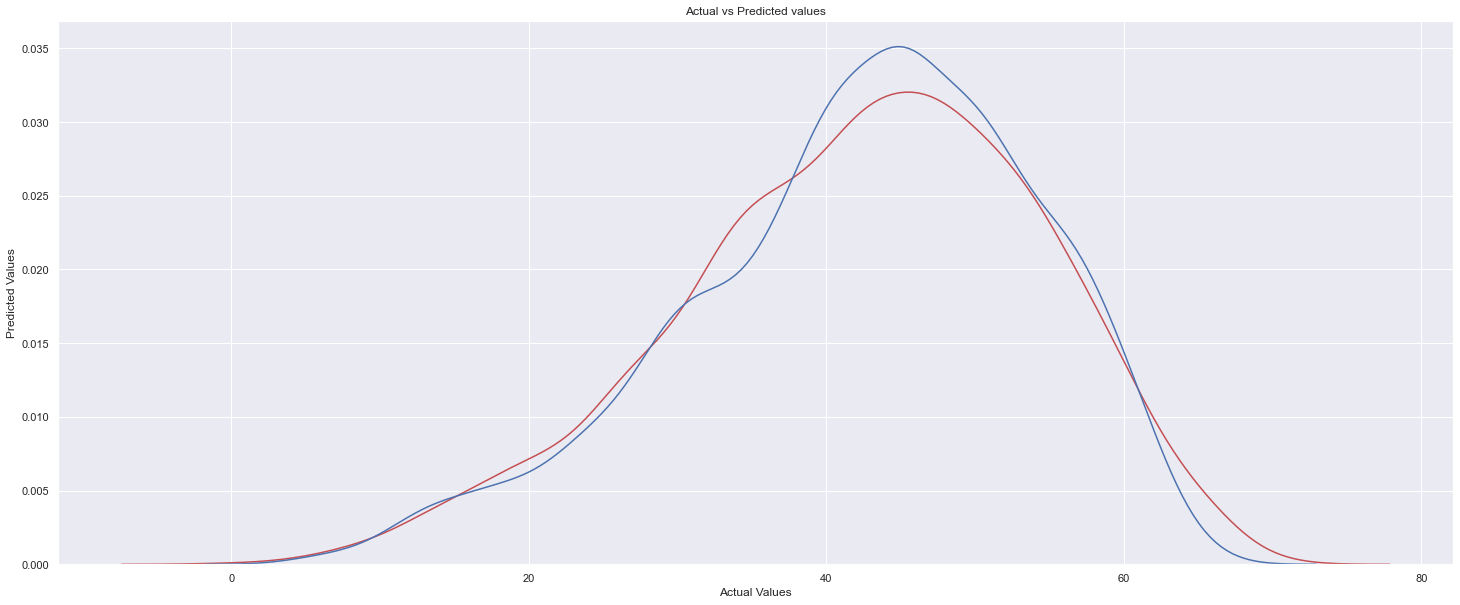

In [6]:
sns.set(rc={'figure.figsize':(25,10)})


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


plt.title('Actual vs Predicted values')


plt.show()

In [7]:
x_pmax = df[['Isc', 'Voc']]
y_pmax = df[['Pmax']]

In [8]:
X_train_pmax, X_test_pmax, y_train_pmax, y_test_pmax = train_test_split(
    x_pmax, y_pmax, test_size=0.2)
regressor_pmax = LinearRegression()
regressor_pmax.fit(X_train_pmax, y_train_pmax.values.ravel())

y_pred_pmax = regressor_pmax.predict(X_test_pmax)
daf_pmax=pd.DataFrame({'Actual':y_test_pmax.values.flatten(), 'Predicted':y_pred_pmax,'Error':abs(y_pred_pmax-y_test_pmax.values.flatten())})
daf_pmax

,Actual,Predicted,Error
0,144.0,141.660223,2.339777
1,179.0,179.844505,0.844505
2,49.0,49.943806,0.943806
3,41.0,40.401852,0.598148
4,149.0,152.643559,3.643559
...,...,...,...
3712,149.0,149.375654,0.375654
3713,156.0,161.084280,5.084280
3714,55.0,56.598148,1.598148
3715,151.0,152.468381,1.468381


In [9]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_pmax, y_pred_pmax)))

Root Mean Squared Error: 2.737939756493998


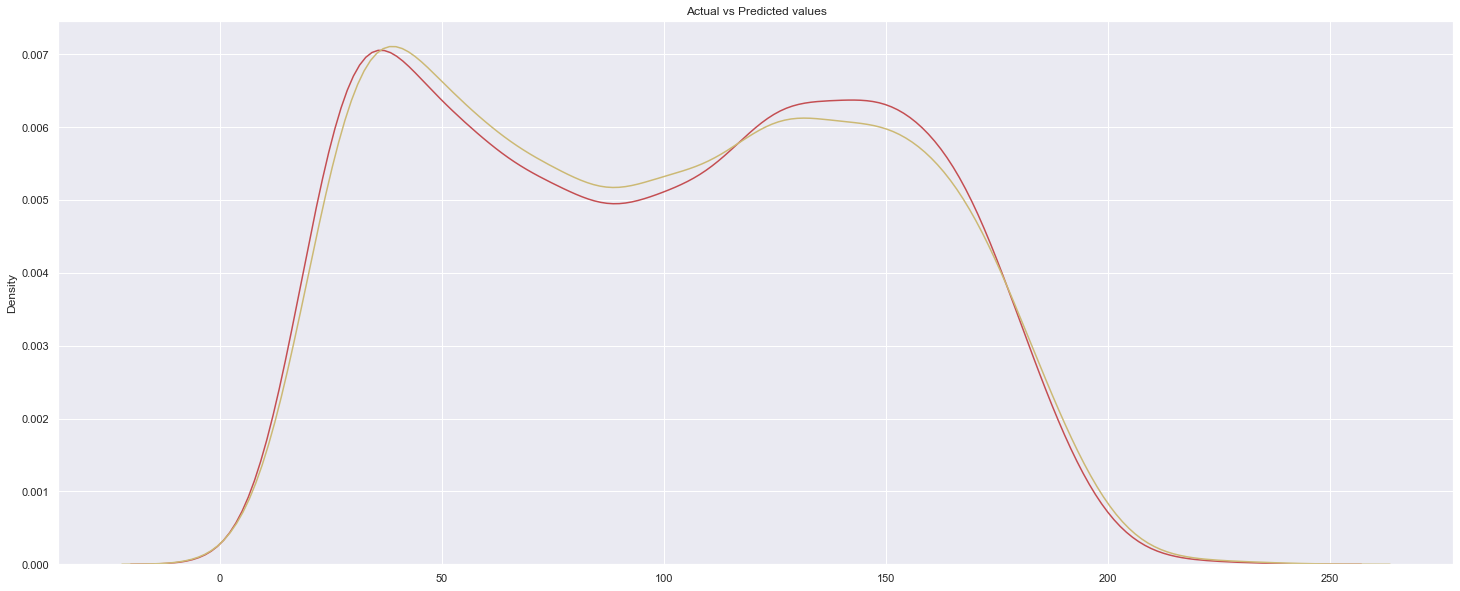

In [10]:
sns.set(rc={'figure.figsize':(25,10)})


ax = sns.distplot(y_test_pmax, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_pmax, hist=False, color="y", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted values')


plt.show()

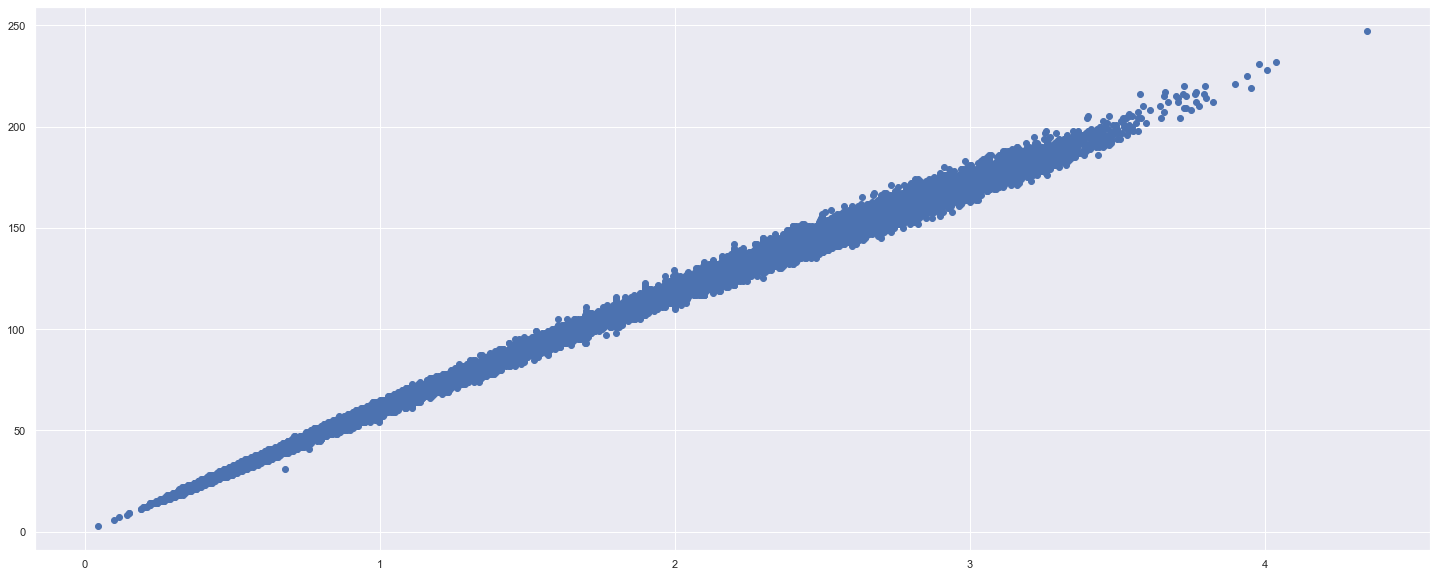

In [11]:
plt.scatter(df[['Ipmax']],df[['Pmax']])
sns.set(rc={'figure.figsize':(25,10)})
